In [1]:
import cv2
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt


In [2]:
# drawing
def plot_two_images(img1: np.array, img2: np.array, img3: np.array, img4: np.array, img5: np.array):
    _, ax = plt.subplots(1, 5, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')
    ax[2].imshow(img3, cmap='gray')
    ax[3].imshow(img4, cmap='gray')
    ax[4].imshow(img5, cmap='gray');
    

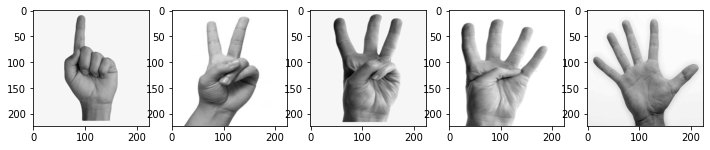

In [3]:
# read images
img1 = Image.open('C:\\Users\\The_Legend\\Desktop\\image-project\\1.jpeg')
img2 = Image.open('C:\\Users\\The_Legend\\Desktop\\image-project\\2.jpeg')
img3 = Image.open('C:\\Users\\The_Legend\\Desktop\\image-project\\3.jpeg')
img4 = Image.open('C:\\Users\\The_Legend\\Desktop\\image-project\\4.jpeg')
img5 = Image.open('C:\\Users\\The_Legend\\Desktop\\image-project\\5.jpeg')

img1 = ImageOps.grayscale(img1)
img2 = ImageOps.grayscale(img2)
img3 = ImageOps.grayscale(img3)
img4 = ImageOps.grayscale(img4)
img5 = ImageOps.grayscale(img5)

img1 = img1.resize(size=(224, 224))
img2 = img2.resize(size=(224, 224))
img3 = img3.resize(size=(224, 224))
img4 = img4.resize(size=(224, 224))
img5 = img5.resize(size=(224, 224))

plot_two_images(
    img1=img1, 
    img2=img2,
    img3=img3,
    img4=img4,
    img5=img5,
)

(226, 226) (226, 226) (226, 226) (226, 226) (226, 226)


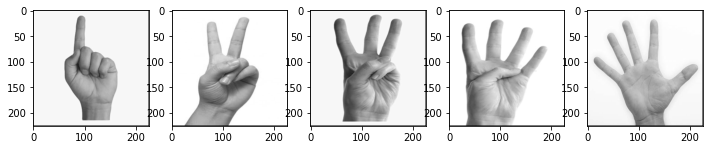

In [4]:
# padding
def get_padding_width_per_side(kernel_size: int) -> int:
    # Simple integer division
    return kernel_size // 2

def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    # Array of zeros of shape (img + padding_width)
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding_width * 2,  # Multiply with two because we need padding on all sides
        img.shape[1] + padding_width * 2
    ))
    
    # Change the inner elements
    # For example, if img.shape = (224, 224), and img_with_padding.shape = (226, 226)
    # keep the pixel wide padding on all sides, but change the other values to be the same as img
    img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img
    
    return img_with_padding

img1_with_padding_3x3 = add_padding_to_image(
    img=np.array(img1), 
    padding_width= get_padding_width_per_side(3)
)
img2_with_padding_3x3 = add_padding_to_image(
    img=np.array(img2), 
    padding_width= get_padding_width_per_side(3)
)
img3_with_padding_3x3 = add_padding_to_image(
    img=np.array(img3), 
    padding_width= get_padding_width_per_side(3)
)
img4_with_padding_3x3 = add_padding_to_image(
    img=np.array(img4), 
    padding_width= get_padding_width_per_side(3)
)
img5_with_padding_3x3 = add_padding_to_image(
    img=np.array(img5), 
    padding_width= get_padding_width_per_side(3)
)
print(img1_with_padding_3x3.shape
,img2_with_padding_3x3.shape,img3_with_padding_3x3.shape,
img4_with_padding_3x3.shape,img5_with_padding_3x3.shape)

plot_two_images(
    img1=img1_with_padding_3x3, 
    img2=img2_with_padding_3x3,
    img3=img3_with_padding_3x3,
    img4=img4_with_padding_3x3,
    img5=img5_with_padding_3x3,
)

In [6]:
# convolution
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

calculate_target_size(224,3)


def convolute(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

def negative_to_zero(img: np.array) -> np.array:
    img = img.copy()
    img[img < 0] = 0
    return img



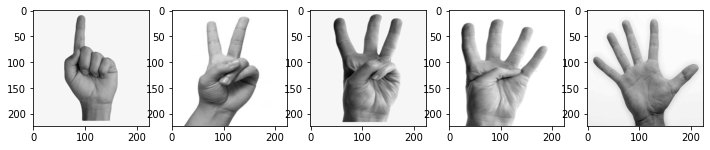

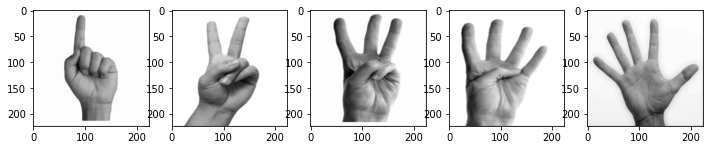

In [9]:
# Guaussian_kernel
def gaussianMask(size, sigma=0.5):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g 

img_smoothed1 = convolute(img1_with_padding_3x3,gaussianMask(3,0.5))
img_smoothed2 = convolute(img2_with_padding_3x3,gaussianMask(3,0.5))
img_smoothed3 = convolute(img3_with_padding_3x3,gaussianMask(3,0.5))
img_smoothed4 = convolute(img4_with_padding_3x3,gaussianMask(3,0.5))
img_smoothed5 = convolute(img5_with_padding_3x3,gaussianMask(3,0.5))


plot_two_images(
    img1=img1, 
    img2=img2,
    img3=img3,
    img4=img4,
    img5=img5,
)

plot_two_images(
    img1=img_smoothed1, 
    img2=img_smoothed2,
    img3=img_smoothed3,
    img4=img_smoothed4,
    img5=img_smoothed5,
)

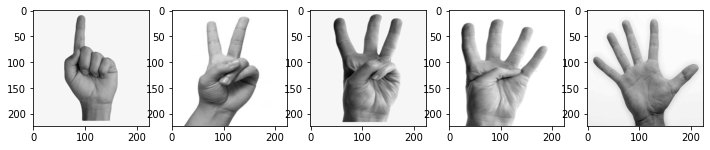

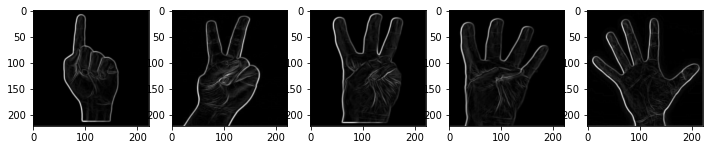

In [14]:
# prewitt
def Prewitt(img):
        Kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], np.float32)
        Ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], np.float32)

        Ix = convolute(img,Kx)
        Iy = convolute(img,Ky)

        G = np.hypot(Ix, Iy)
        G = G / G.max() * 255
        theta = np.arctan2(Iy, Ix)
        return (G, theta)

gradientM1, thetaMat1 = Prewitt(img_smoothed1) 
gradientM2, thetaMat2 = Prewitt(img_smoothed2) 
gradientM3, thetaMat3 = Prewitt(img_smoothed3) 
gradientM4, thetaMat4 = Prewitt(img_smoothed4) 
gradientM5, thetaMat5 = Prewitt(img_smoothed5)   

plot_two_images(
    img1=img1, 
    img2=img2,
    img3=img3,
    img4=img4,
    img5=img5,
)

plot_two_images(
    img1=gradientM1, 
    img2=gradientM2,
    img3=gradientM3,
    img4=gradientM4,
    img5=gradientM5,
)


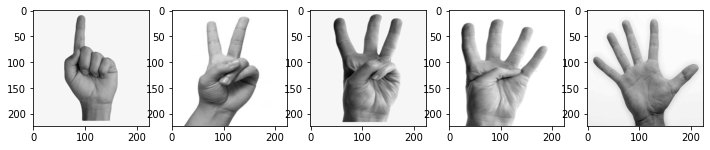

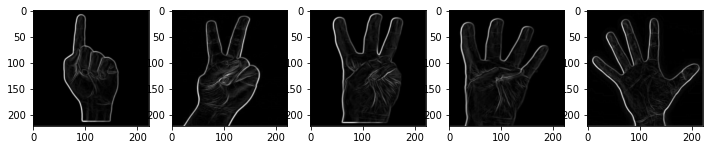

In [15]:
# sobel
def sobil(img):
        Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
        Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

        Ix = convolute(img,Kx)
        Iy = convolute(img,Ky)

        G = np.hypot(Ix, Iy)
        G = G / G.max() * 255
        theta = np.arctan2(Iy, Ix)
        return (G, theta)

gradientMat1, thetaMat1 = sobil(img_smoothed1) 
gradientMat2, thetaMat2 = sobil(img_smoothed2) 
gradientMat3, thetaMat3 = sobil(img_smoothed3) 
gradientMat4, thetaMat4 = sobil(img_smoothed4) 
gradientMat5, thetaMat5 = sobil(img_smoothed5)   

plot_two_images(
    img1=img1, 
    img2=img2,
    img3=img3,
    img4=img4,
    img5=img5,
)

plot_two_images(
    img1=gradientMat1, 
    img2=gradientMat2,
    img3=gradientMat3,
    img4=gradientMat4,
    img5=gradientMat5,
)


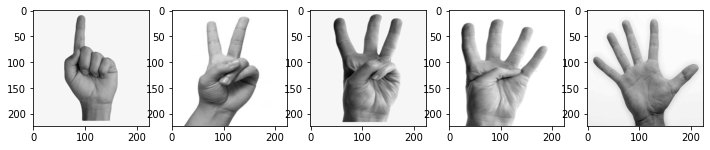

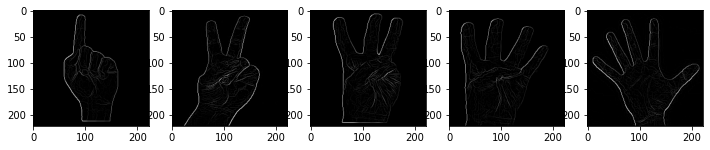

In [21]:
def non_maximaSuppression(img, D):
        M, N = img.shape
        Z = np.zeros((M,N), dtype=np.int32)
        angle = D * 180. / np.pi
        angle[angle < 0] += 180


        for i in range(1,M-1):
            for j in range(1,N-1):
                try:
                    q = 255
                    r = 255

                   #angle 0
                    if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                        q = img[i, j+1]
                        r = img[i, j-1]
                    #angle 45
                    elif (22.5 <= angle[i,j] < 67.5):
                        q = img[i+1, j-1]
                        r = img[i-1, j+1]
                    #angle 90
                    elif (67.5 <= angle[i,j] < 112.5):
                        q = img[i+1, j]
                        r = img[i-1, j]
                    #angle 135
                    elif (112.5 <= angle[i,j] < 157.5):
                        q = img[i-1, j-1]
                        r = img[i+1, j+1]

                    if (img[i,j] >= q) and (img[i,j] >= r):
                        Z[i,j] = img[i,j]
                    else:
                        Z[i,j] = 0


                except IndexError as e:
                    pass

        return Z


nonMaxImg1 = non_maximaSuppression(gradientMat1,thetaMat1)
nonMaxImg2 = non_maximaSuppression(gradientMat2,thetaMat2)
nonMaxImg3 = non_maximaSuppression(gradientMat3,thetaMat3)
nonMaxImg4 = non_maximaSuppression(gradientMat4,thetaMat4)
nonMaxImg5 = non_maximaSuppression(gradientMat5,thetaMat5)

plot_two_images(
    img1=img1, 
    img2=img2,
    img3=img3,
    img4=img4,
    img5=img5,
)

plot_two_images(
    img1=nonMaxImg1, 
    img2=nonMaxImg2,
    img3=nonMaxImg3,
    img4=nonMaxImg4,
    img5=nonMaxImg5,
)


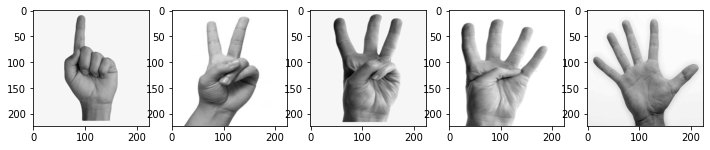

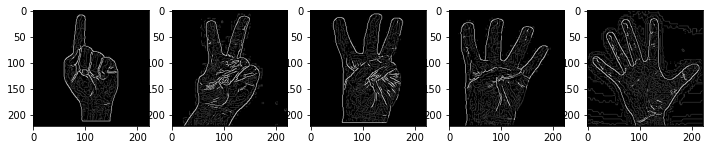

In [20]:
def double_threshold(img):
        # high / low ThresholdRatio
        highThreshold = img.max() * 0.15;
        lowThreshold = highThreshold * 0.05;

        M, N = img.shape
        res = np.zeros((M,N), dtype=np.int32)

        weak = np.int32(75)
        strong = np.int32(255)

        strong_i, strong_j = np.where(img >= highThreshold)
        zeros_i, zeros_j = np.where(img < lowThreshold)

        weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

        res[strong_i, strong_j] = strong
        res[weak_i, weak_j] = weak

        return (res)

thresholdImg1 = double_threshold(nonMaxImg1)
thresholdImg2 = double_threshold(nonMaxImg2) 
thresholdImg3 = double_threshold(nonMaxImg3) 
thresholdImg4 = double_threshold(nonMaxImg4) 
thresholdImg5 = double_threshold(nonMaxImg5)      

plot_two_images(
    img1=img1, 
    img2=img2,
    img3=img3,
    img4=img4,
    img5=img5,
)

plot_two_images(
    img1=thresholdImg1, 
    img2=thresholdImg2,
    img3=thresholdImg3,
    img4=thresholdImg4,
    img5=thresholdImg5,
)

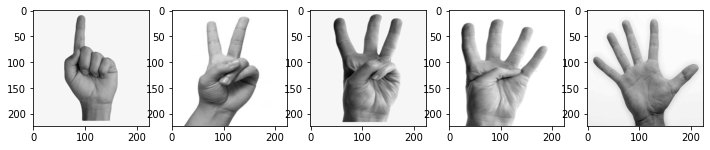

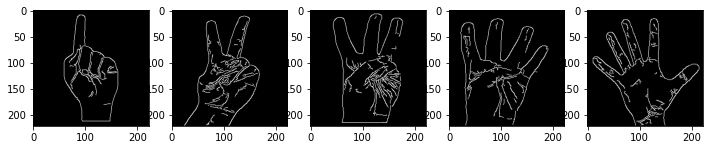

In [18]:
def EdgeLinking(img):

        M, N = img.shape
        weak = 75
        strong = 255

        for i in range(1, M-1):
            for j in range(1, N-1):
                if (img[i,j] == weak):
                    try:
                        if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                            or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                            or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                            img[i, j] = strong
                        else:
                            img[i, j] = 0
                    except IndexError as e:
                        pass

        return img

img_final1 = EdgeLinking(thresholdImg1)
img_final2 = EdgeLinking(thresholdImg2)
img_final3 = EdgeLinking(thresholdImg3)
img_final4 = EdgeLinking(thresholdImg4)
img_final5 = EdgeLinking(thresholdImg5)

plot_two_images(
    img1=img1, 
    img2=img2,
    img3=img3,
    img4=img4,
    img5=img5,
)

plot_two_images(
    img1=img_final1, 
    img2=img_final2,
    img3=img_final3,
    img4=img_final4,
    img5=img_final5,
)